<a href="https://colab.research.google.com/github/mnilsson8/DSPS_mNilsson/blob/main/Labs/in_class_clusteringGenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn import cluster
import scipy as sp
from scipy import spatial
import seaborn as sns


%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/refs/heads/main/fbb.mplstyle")
np.set_printoptions(precision=2)
rcParams['figure.figsize'] = 10, 10


Populating the interactive namespace from numpy and matplotlib


read the data in https://github.com/fedhere/DSPS/tree/master/HW10

In [2]:
genes = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/refs/heads/main/data/kidpackgenes.csv", index_col=0)

In [3]:
genes.head()

1         2         3         4         5         6         7  \
1 -0.146342 -0.520637  0.175828 -0.323736  0.172691  0.025156  0.024812   
2 -0.465767  0.155823  0.226344 -0.547542  0.041096  0.137012  0.102497   
3 -0.088964 -0.208241 -0.151039 -0.288229 -0.425568  0.121006 -0.097883   
4 -0.327696 -1.714948  0.068710 -0.168257 -0.471577  0.279013 -0.060734   
5 -0.092327 -0.660456  0.075948 -0.646501 -0.046137 -0.010305  0.368476   

          8        10        11  ...        76        77        78        79  \
1  0.172268  0.207188  0.026710  ...  0.240705 -0.347746 -0.001797 -0.260594   
2 -0.034277  0.500871  0.005533  ...  0.371435 -0.447105 -0.134904 -0.250699   
3 -0.007597  0.329636 -0.222495  ... -0.014990 -0.458297 -0.050852 -0.168500   
4 -0.222574  0.658097  0.129876  ...  0.153765 -0.140409 -0.119515 -0.289881   
5 -0.043832 -0.321060  0.116657  ... -0.033032  0.394082  0.173515 -0.194819   

         81        83        84        85        86        87  
1  0.105968  0.110885 -0.006975  0.550118  0.118934  0.327248  
2  0.164698 -0.035022  0.250384  0.463746 -0.514230  0.200956  
3  0.078716 -0.032231 -0.116947 -0.199880 -0.415793 -0.032004  
4  0.944493 -0.142710 -1.119866 -0.215536  0.345946  0.056442  
5  0.149131 -0.097285 -0.288192 -0.491920 -0.722120  0.055477  

[5 rows x 74 columns]

# 1. explore the data.

In [4]:
genes.shape

(4224, 74)

In [5]:
genes.describe

<bound method NDFrame.describe of              1         2         3         4         5         6         7  \
1    -0.146342 -0.520637  0.175828 -0.323736  0.172691  0.025156  0.024812   
2    -0.465767  0.155823  0.226344 -0.547542  0.041096  0.137012  0.102497   
3    -0.088964 -0.208241 -0.151039 -0.288229 -0.425568  0.121006 -0.097883   
4    -0.327696 -1.714948  0.068710 -0.168257 -0.471577  0.279013 -0.060734   
5    -0.092327 -0.660456  0.075948 -0.646501 -0.046137 -0.010305  0.368476   
...        ...       ...       ...       ...       ...       ...       ...   
4220 -0.314408  0.131512 -0.049018 -0.674385 -0.289890  0.258422 -0.120400   
4221 -0.313823 -0.041095 -0.049798 -0.492502 -0.223146  0.172682 -0.164426   
4222 -0.091283  0.118607 -0.088939 -0.349571 -0.107676  0.019609  0.187555   
4223 -0.552395  0.125635 -0.290230 -1.283253 -0.870161 -0.131500  0.100046   
4224 -0.907778 -0.052512 -0.216276 -1.484158 -0.719684 -0.386958 -0.123006   

             8        10        11  ...        76        77        78  \
1     0.172268  0.207188  0.026710  ...  0.240705 -0.347746 -0.001797   
2    -0.034277  0.500871  0.005533  ...  0.371435 -0.447105 -0.134904   
3    -0.007597  0.329636 -0.222495  ... -0.014990 -0.458297 -0.050852   
4    -0.222574  0.658097  0.129876  ...  0.153765 -0.140409 -0.119515   
5    -0.043832 -0.321060  0.116657  ... -0.033032  0.394082  0.173515   
...        ...       ...       ...  ...       ...       ...       ...   
4220 -0.060359  0.706799 -0.326422  ...  0.379001  0.009101 -0.182293   
4221  0.033539  0.420965 -0.180468  ...  0.086748  0.198886 -0.167620   
4222  0.214635  0.210662 -0.127357  ... -0.121660  0.004138 -0.170726   
4223  0.153907  0.582813 -0.273445  ...  0.219980 -0.503742 -0.727327   
4224 -0.313543  0.271196 -0.370716  ... -0.601880 -0.472821 -0.446067   

            79        81        83        84        85        86        87  
1    -0.260594  0.105968  0.110885 -0.006975  0.550118  0.118934  0.327248  
2    -0.250699  0.164698 -0.035022  0.250384  0.463746 -0.514230  0.200956  
3    -0.168500  0.078716 -0.032231 -0.116947 -0.199880 -0.415793 -0.032004  
4    -0.289881  0.944493 -0.142710 -1.119866 -0.215536  0.345946  0.056442  
5    -0.194819  0.149131 -0.097285 -0.288192 -0.491920 -0.722120  0.055477  
...        ...       ...       ...       ...       ...       ...       ...  
4220 -0.270911 -0.434925 -0.031925  1.402160  0.502573 -0.061042 -0.206210  
4221 -0.336774  0.022460 -0.211773  0.379261  0.465487  0.024584 -0.264364  
4222 -0.129437 -0.379607  0.007242  0.258818  0.284263 -0.008146 -0.047151  
4223 -0.477732 -0.523019 -0.382573  0.830773  0.246017 -0.002329  0.100187  
4224 -0.528082 -0.126050 -0.546075  0.043611 -0.179660 -0.712337 -0.193261  

[4224 rows x 74 columns]>

In [9]:
genes.isna().sum().sum()

np.int64(0)

There are no missing values. The data consists of 4224 observations and 75 gene expressions. A quick google search shows that this is as expected: https://www.bioconductor.org/packages/devel/data/experiment/manuals/kidpack/man/kidpack.pdf

array([[<Axes: xlabel='1', ylabel='1'>, <Axes: xlabel='2', ylabel='1'>,
        <Axes: xlabel='3', ylabel='1'>, ...,
        <Axes: xlabel='85', ylabel='1'>, <Axes: xlabel='86', ylabel='1'>,
        <Axes: xlabel='87', ylabel='1'>],
       [<Axes: xlabel='1', ylabel='2'>, <Axes: xlabel='2', ylabel='2'>,
        <Axes: xlabel='3', ylabel='2'>, ...,
        <Axes: xlabel='85', ylabel='2'>, <Axes: xlabel='86', ylabel='2'>,
        <Axes: xlabel='87', ylabel='2'>],
       [<Axes: xlabel='1', ylabel='3'>, <Axes: xlabel='2', ylabel='3'>,
        <Axes: xlabel='3', ylabel='3'>, ...,
        <Axes: xlabel='85', ylabel='3'>, <Axes: xlabel='86', ylabel='3'>,
        <Axes: xlabel='87', ylabel='3'>],
       ...,
       [<Axes: xlabel='1', ylabel='85'>, <Axes: xlabel='2', ylabel='85'>,
        <Axes: xlabel='3', ylabel='85'>, ...,
        <Axes: xlabel='85', ylabel='85'>,
        <Axes: xlabel='86', ylabel='85'>,
        <Axes: xlabel='87', ylabel='85'>],
       [<Axes: xlabel='1', ylabel='86'>, <

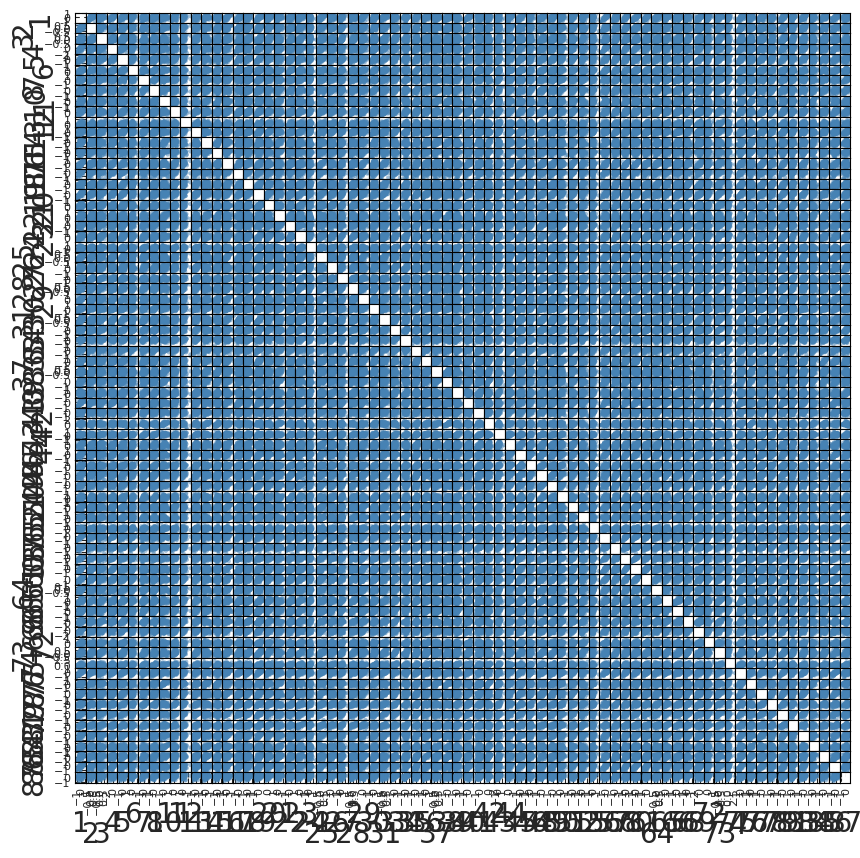

In [ ]:
np.random.seed(302)
pd.plotting.scatter_matrix(genes.iloc[np.random.randint(0, genes.shape[0], 100)])

In [ ]:
genes.describe()

1            2            3            4            5  \
count  4224.000000  4224.000000  4224.000000  4224.000000  4224.000000   
mean     -0.094115    -0.027780    -0.001672    -0.110167    -0.047817   
std       0.502677     0.340808     0.328042     0.692851     0.434918   
min      -2.205219    -1.779857    -3.072872    -3.491640    -2.479485   
25%      -0.394770    -0.227638    -0.182975    -0.528570    -0.277542   
50%      -0.069031    -0.016486    -0.014913    -0.046870    -0.018104   
75%       0.235924     0.178946     0.167848     0.376756     0.217731   
max       2.403599     1.609597     2.357123     1.987768     2.278563   

                 6            7            8           10           11  ...  \
count  4224.000000  4224.000000  4224.000000  4224.000000  4224.000000  ...   
mean     -0.000598    -0.043284    -0.029803    -0.055334    -0.017651  ...   
std       0.348743     0.377675     0.350009     0.477607     0.353382  ...   
min      -2.767680    -1.807954    -1.835609    -3.214822    -2.205530  ...   
25%      -0.178646    -0.292570    -0.223971    -0.312487    -0.227375  ...   
50%       0.021162    -0.072925    -0.018363    -0.066373    -0.008910  ...   
75%       0.208004     0.168238     0.182520     0.205242     0.195324  ...   
max       2.106546     1.957411     1.807777     2.719371     3.194689  ...   

                76           77           78           79           81  \
count  4224.000000  4224.000000  4224.000000  4224.000000  4224.000000   
mean     -0.033086    -0.050599    -0.023801    -0.042946     0.020522   
std       0.482347     0.410243     0.327410     0.354847     0.389799   
min      -2.946771    -3.281180    -2.787443    -1.938678    -2.932198   
25%      -0.315895    -0.298579    -0.191197    -0.259851    -0.207651   
50%      -0.026565    -0.042374    -0.010210    -0.015849    -0.001221   
75%       0.241220     0.200383     0.160373     0.195828     0.226961   
max       3.058383     1.960692     1.940195     1.352897     2.451836   

                83           84           85           86           87  
count  4224.000000  4224.000000  4224.000000  4224.000000  4224.000000  
mean     -0.051150     0.004469    -0.001898    -0.143864    -0.002374  
std       0.401593     0.479766     0.487669     0.532901     0.346003  
min      -3.054572    -3.189679    -2.955538    -2.909000    -1.563549  
25%      -0.259171    -0.242053    -0.264326    -0.441299    -0.210836  
50%      -0.024906    -0.006854    -0.021976    -0.095412    -0.016940  
75%       0.195206     0.243014     0.237617     0.208726     0.189075  
max       1.733719     2.586922     3.230761     1.583828     1.694063  

[8 rows x 74 columns]

In [10]:
#scale genes
scaledgenes = skl.preprocessing.scale(genes,axis = 0)

In [11]:
scaledgenes.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [16]:
#how do you check if you cannot use describe??
scaledgenes.mean(axis=0).round(2)

array([ 0., -0.,  0., -0., -0., -0.,  0., -0., -0.,  0.,  0., -0.,  0.,
        0., -0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0.,  0.,
       -0., -0.,  0.,  0., -0.,  0., -0.,  0., -0., -0.,  0., -0., -0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,
        0.,  0., -0.,  0., -0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0.,
       -0., -0., -0.,  0., -0.,  0.,  0., -0., -0.])

In [14]:
scaledgenes.std(axis=0).round(2)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

2.1 use TSNE to make a projection of the data on an optimal 2D plane using https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [17]:
genes_tsne = skl.manifold.TSNE(n_components=2)
genes_tsne

TSNE()

In [18]:
twodproj = genes_tsne.fit_transform(scaledgenes)
twodproj.shape

(4224, 2)

2.3 plot the TSNE projection


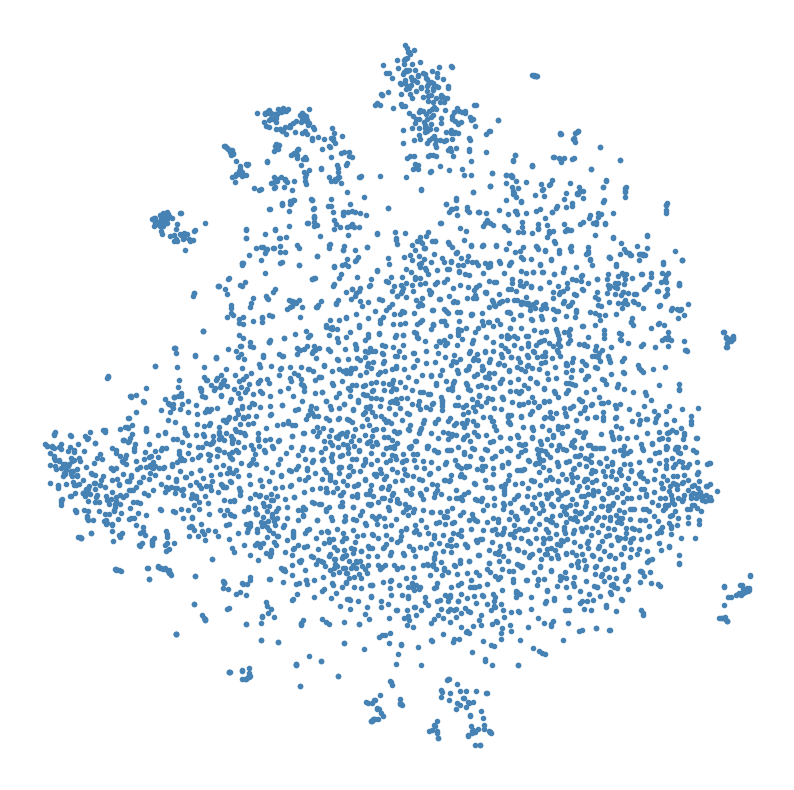

In [ ]:
pl.plot(twodproj[:,0], twodproj[:,1], '.')
pl.axis('off');

Figure 1: 2-dimensional projection of the "kidpack" genes which (from a trivial google search) contains expression measures for 4224 genes and 74 patients. This 2D projection is generates with the TSNE algorithm with default sklearn parameters corresponding to 30 nearest-neighbours and a Eucledian distance metric in the 72 dimensional parameter space. Note that TSNE plots are an exception to the rule that axis always need to be labelled! the TSNE projections are unitless and do not have any physical meaning.

OBSOLETE: 2.4 calculate a function that measures the intracluster variance _ BUT YOU CAN USE THE .inertia_ ATTRIBUTE OF KMeans() SO NO LONGER NECESSARY

# DISTANCES
2.5 calculate and plot the distance matrix if you have not yet. Discuss: is there structure?


In [30]:
#calculate pairwise distance with the euclidean metric
dists = sp.spatial.distance.pdist(scaledgenes)

4a.2 make a histogram of the pairwise distances. You should choose a value to initialize dbscan that is just below the mean

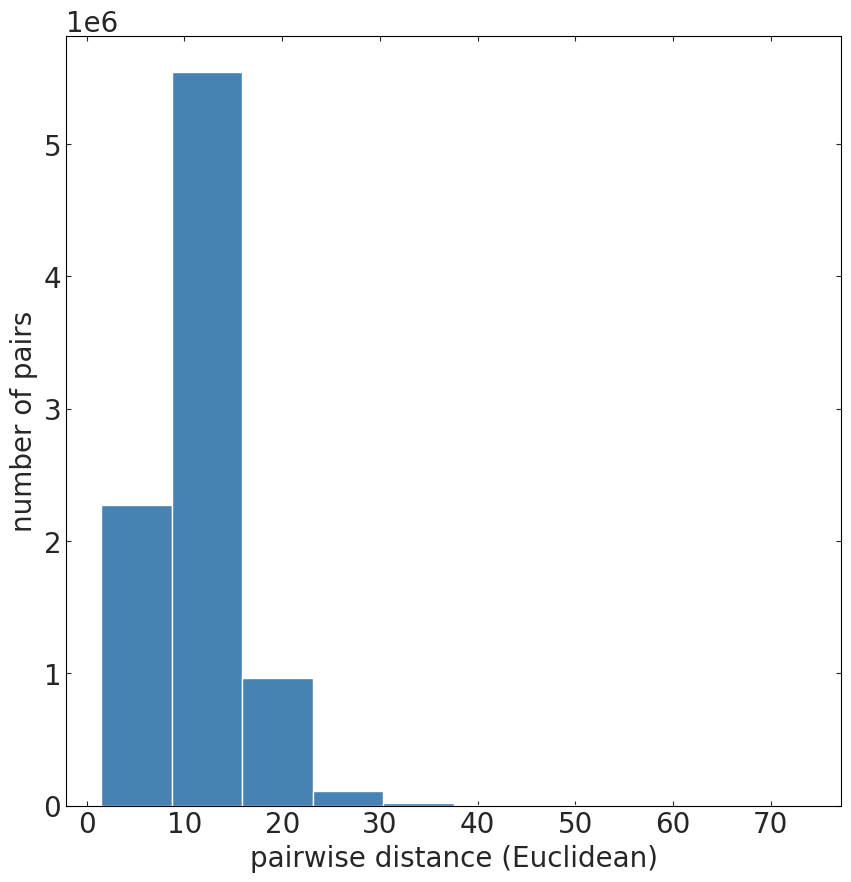

In [31]:
pl.hist(dists);
pl.ylabel("number of pairs")
pl.xlabel("pairwise distance (Euclidean)");

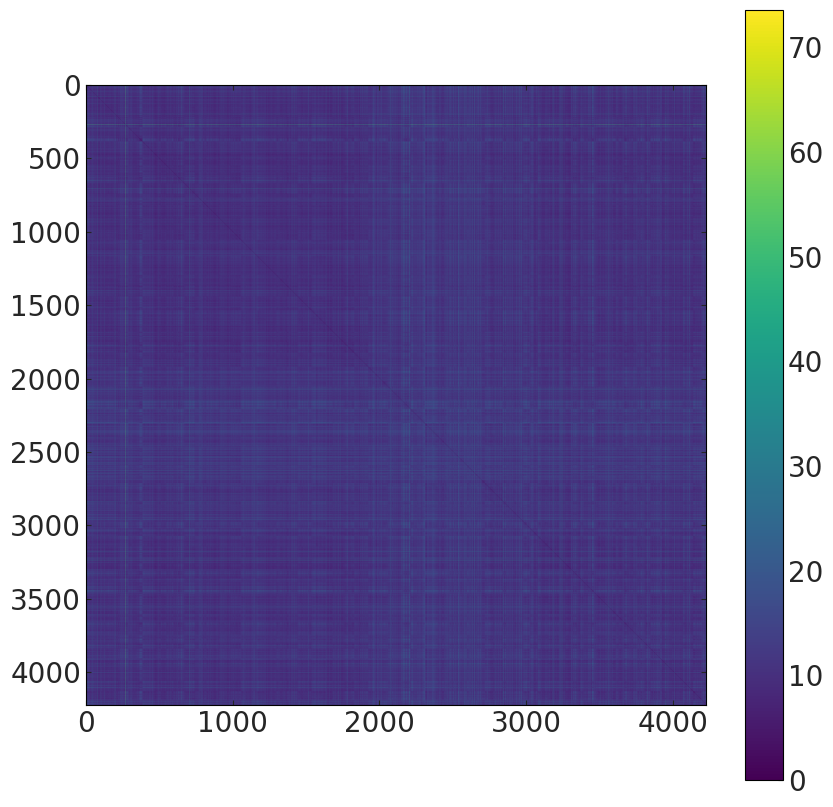

In [32]:
#plot them
pl.imshow(sp.spatial.distance.squareform(dists))
pl.colorbar()

**Figure 2**: the distance matrix for a Euclidian distance between observations in the kidpack genes library. There is no obvious structure but the small dynamic range impairs the visual inspection. A log plot may give more insight.

# 3 K-Means clustering
3.1 cluster the data with K-Means using 1 to 10 clusters. Calculate and plot the intracluster variance as a function of number of clusters and look for an "elbow" in the value of the intracluster variance. What is the optimal number of clusters? discuss

In [37]:
#cluster the first 2 features only with kmeans into 2 clusters
km =skl.cluster.KMeans(n_clusters = 2,random_state = 302)

In [38]:
km.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 'auto',
 'random_state': 302,
 'tol': 0.0001,
 'verbose': 0}

In [39]:
km.inertia_

AttributeError: 'KMeans' object has no attribute 'inertia_'

In [40]:
km.fit(scaledgenes[:,:2])

KMeans(n_clusters=2, random_state=302)

In [41]:
km.inertia_

4699.801682342804

In [44]:
km.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [ ]:
...

In [45]:
km.cluster_centers_

array([[ 0.59,  0.56],
       [-0.8 , -0.75]])

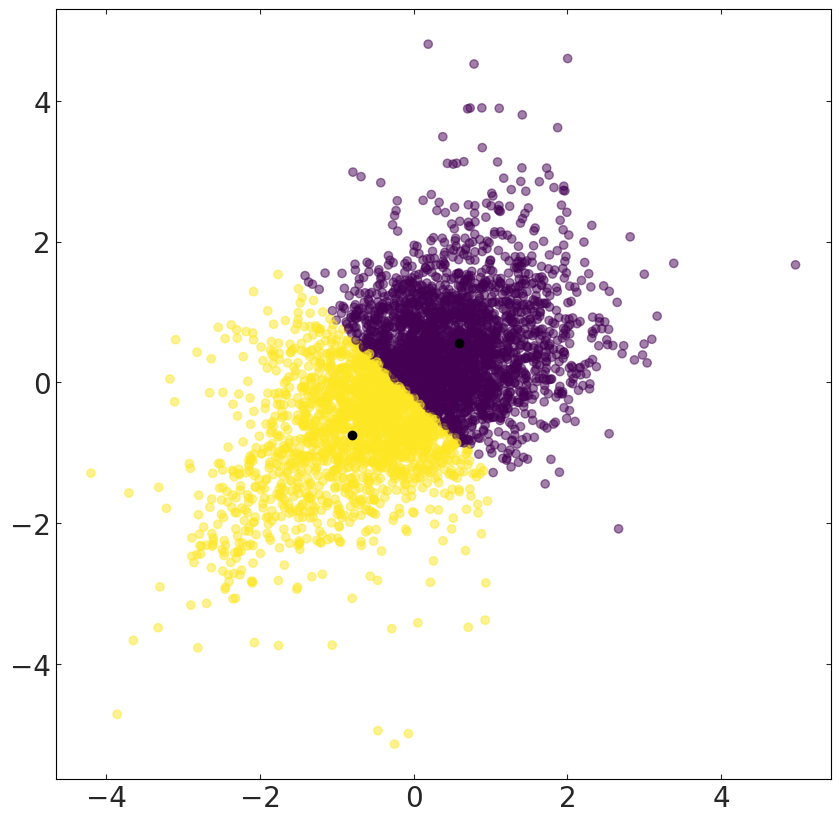

In [50]:
#replot with the cluster centers on top
pl.scatter(scaledgenes[:,0],scaledgenes[:,1],c = km.labels_, alpha = .5)
pl.plot(km.cluster_centers_[:,0],km.cluster_centers_[:,1],"ko")

In [51]:
skl.cluster.KMeans(n_clusters = 2)
km.fit(scaledgenes)
km.labels_

array([0, 0, 0, ..., 0, 1, 1], dtype=int32)

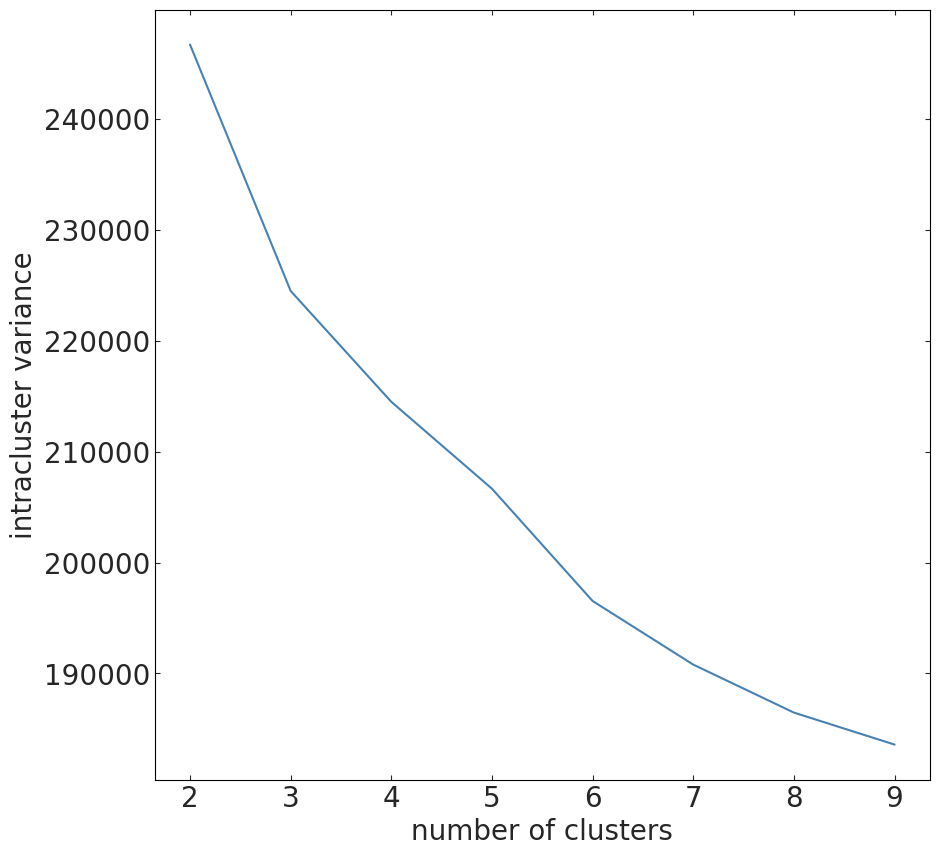

In [57]:
tv = []
for i in range(2, 10):
    km = skl.cluster.KMeans(n_clusters = i, random_state=302).fit(scaledgenes)
    tv.append(km.inertia_)
pl.plot(range(2,10), tv)
pl.xlabel("number of clusters")
pl.ylabel("intracluster variance");



Space doesn't cluster very well by Euclidean space -> distance based clustering isn't a good idea for this data set -> b/c no inflection point

**Figure 3**: an "elbow" plot for k-means clustering of the kidpack genes dataset shown in Figure 1. The prominent bend in the plot of intracluster variance vs number of clusters at Nclusters = 3 suggests that this is the correct number of clusters for a k-means clustering analysis

3.2 plot the cluster on the 2D TSNE projection colorcoded by clusters

In [62]:
Nclust = 3
geneclustersKM = cluster.KMeans(n_clusters=Nclust).fit(scaledgenes)


In [59]:
geneclustersKM.labels_

array([1, 1, 0, ..., 0, 0, 2], dtype=int32)

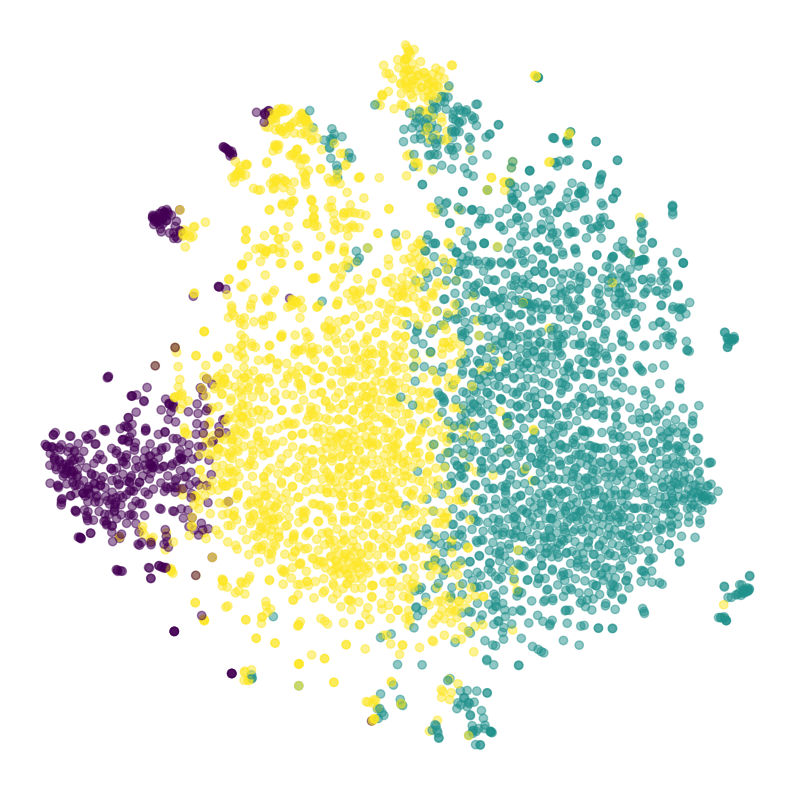

In [66]:
#plots dont need to look exactly like mine
pl.axis('off');
pl.scatter(twodproj[:,0], twodproj[:,1],c = geneclustersKM.labels_/geneclustersKM.labels_.max(),alpha = 0.5)

In [67]:
geneclustersKM.cluster_centers_

array([[-1.53, -1.22, -1.07, -1.36, -1.46, -1.33, -0.71, -1.  , -0.97,
        -1.36, -1.1 , -1.43, -0.92, -0.81, -1.32, -1.34, -1.13, -1.47,
        -1.34, -0.66, -1.27, -1.23, -1.21, -1.42, -1.27, -1.3 , -1.3 ,
        -1.32, -1.27, -1.22, -1.32, -0.96, -1.37, -1.16, -0.68, -1.25,
        -0.85, -1.33, -1.09, -0.84, -1.13, -1.03, -1.38, -1.4 , -1.19,
        -1.49, -1.14, -0.7 , -0.78, -0.76, -1.64, -1.33, -1.5 , -1.56,
        -1.56, -1.37, -1.35, -1.16, -1.16, -1.1 , -0.94, -1.41, -0.74,
        -1.59, -1.04, -1.34, -1.29, -1.44, -1.11, -1.27, -0.85, -1.34,
        -1.61, -1.04],
       [ 0.62,  0.49,  0.43,  0.51,  0.5 ,  0.32,  0.34,  0.26,  0.17,
         0.51,  0.44,  0.57,  0.21,  0.2 ,  0.6 ,  0.44,  0.44,  0.59,
         0.55,  0.07,  0.39,  0.56,  0.38,  0.64,  0.47,  0.58,  0.57,
         0.55,  0.35,  0.55,  0.56,  0.34,  0.36,  0.43,  0.14,  0.26,
         0.34,  0.51,  0.36,  0.13,  0.41,  0.44,  0.59,  0.43,  0.51,
         0.64,  0.42,  0.35,  0.44,  0.18,  0.6 ,  0.5

**Figure 3**: the clusters generated by K-means plotted in the 2D TSNE projection. The K-means clusters are adjacent in the TSNE 2D  projection, however they are not clearly separated indicating that There is no obvious pattern in common between the K-means model and the TSBE solution

# Use DBSCAN

**Figure 6**: Distribution of pairwise Eucledian distances between gene observations in the kidpack gene library. This histogram will be used to guess an appriopriate distance to define core clusters in the DBSCAN method

4a.3 initialize the dbscan eps value appropriately and fit a dbscan model to the data plot the 2D TSNE projection colorcoded as before.



In [87]:
dbsclusters = skl.cluster.DBSCAN(eps=6, min_samples=6).fit(scaledgenes)

4a.4 How many clusters do you have, how many outliers? is that a significant number?

In [88]:
print("number of clusters:", dbsclusters.labels_.max() + 1)

number of clusters: 3


In [89]:
noutliers = (dbsclusters.labels_==-1).sum()
print("number of outliers:", noutliers)

number of outliers: 1188


In [90]:
print("fraction of outliers: {:.2f}".format(noutliers * 1.0 / len(dbsclusters.labels_)))

fraction of outliers: 0.28


This hyperparameter selection leads to the identification of 30% of the points as "outliers". This fraction is too high and cannot be generally justified unless there is a strong contextual motivation for it. A better set of hyperparameters should be chosen

In [91]:
np.unique(dbsclusters.labels_, return_counts=True)

(array([-1,  0,  1,  2]), array([1188, 3003,   14,   19]))

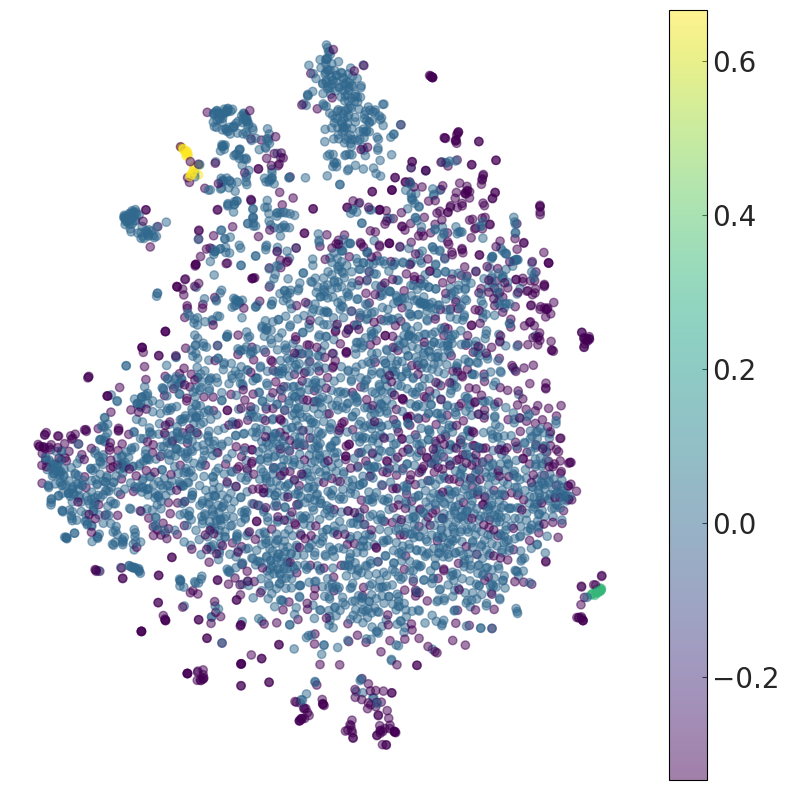

In [92]:
pl.scatter(twodproj[:,0], twodproj[:,1], c=dbsclusters.labels_/ (dbsclusters.labels_.max() + 1), alpha=0.5)
pl.axis('off')
pl.colorbar();

**Figure 7**: the clusters generated by DBSCAN plotted in the 2D TSNE projection. There is no obvious pattern in common between the DBSCAN model and the TSBE solution

# 4b Agglomerative clustering


4b.1 calculate the linkage and plot the dendrogram of the clusters  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html


In [93]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [94]:
Z = linkage(scaledgenes, 'ward')


Text(0.5, 1.0, 'Agglomerative clustering linkage: Ward')

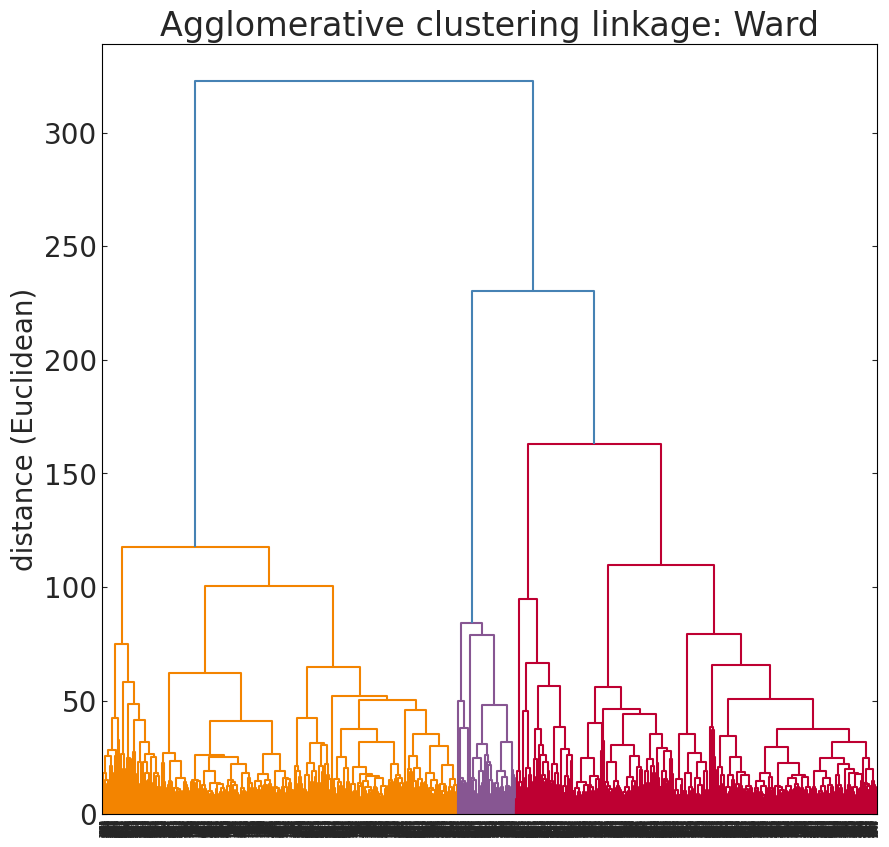

In [95]:
dendrogram(Z);
pl.ylabel("distance (Euclidean)");
pl.title("Agglomerative clustering linkage: Ward")

**Figure 8**: Result of clustering with Agglomerative algorithm, Eucledian distance and Ward linkage: the core aggregation provides 3 clusters (somwehat consistently with the result of the K-Means algorithm)

4b.2 repeat with a different linkage and comment on differences

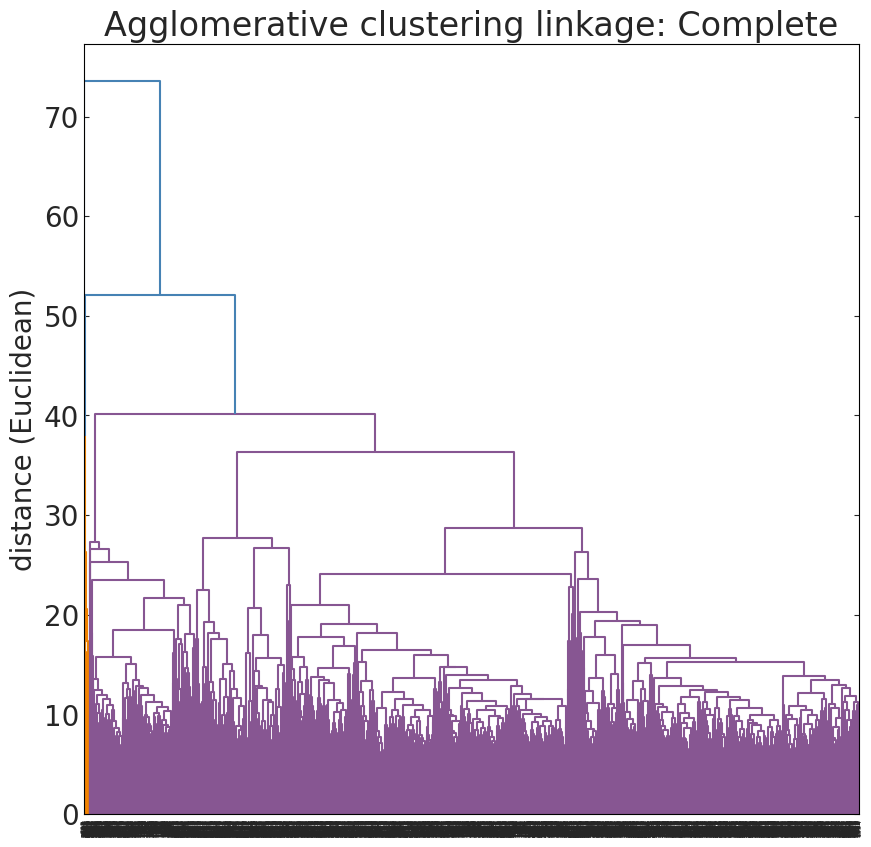

In [96]:
Z = linkage(scaledgenes, 'complete')
dendrogram(Z);
pl.ylabel("distance (Euclidean)");
pl.title("Agglomerative clustering linkage: Complete");

**Figure 9**: Result of clustering with Agglomerative algorithm, Eucledian distance and "complete" linkage, i.e. distance between clusters are calculates as the maximum distance between the element of the clusters. Since the linkage scheme is radically different, as ecxpected, the result of the agglomrataion is visibly different.


4b.3 rerun agglomerative cluatering to get the "ideal" number of clusters as decided by k-means. plot the 2D TSNE projection colorcoded as before.

In [97]:
#linkage="ward", metric='euclidean'
geneclustersAg = skl.cluster.AgglomerativeClustering(n_clusters=Nclust,linkage = "ward", metric = "euclidean")

geneclustersAg.fit(scaledgenes)


AgglomerativeClustering(n_clusters=3)

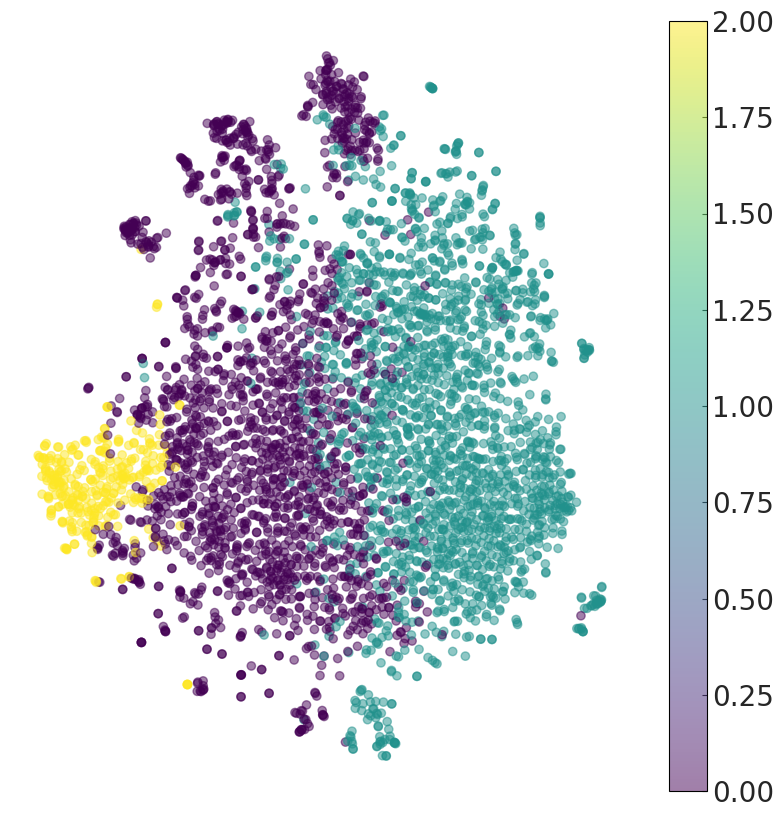

In [98]:
pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersAg.labels_, alpha=0.5)
pl.axis('off')
pl.colorbar();

**Figure 10**: the rsult of agglomerative clustering performed with the same distance metric as the K-means clustering, for the same number of sclusters (and with Ward linkage) is generally consistent with the result obtained with K-Means clustering


In [100]:
#linkage = complete, metric=euclidean
geneclustersAg = skl.cluster.AgglomerativeClustering(n_clusters=Nclust,linkage = "complete", metric="euclidean")
geneclustersAg.fit(scaledgenes)


AgglomerativeClustering(linkage='complete', n_clusters=3)

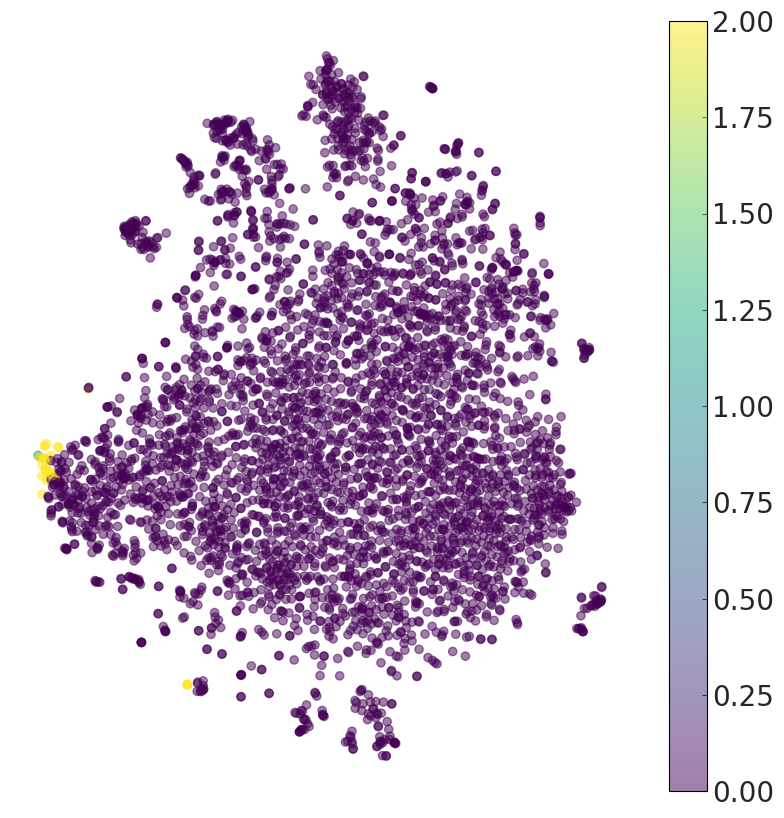

In [101]:
pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersAg.labels_, alpha=0.5)
pl.axis('off')
pl.colorbar();

**Figure 11**: the rsult of agglomerative clustering performed with the same distance metric as the K-means clustering, for the same number of sclusters *but with complete linkage* is not consistent with the result obtained with K-Means clustering: the clusters are much more unbalanced (note that this was not required)